# DSC 550 

### Term Paper:  Chocolate!

Author: Kimberly Cable<br>
Term: Summer, 2022

## Milestone 1: Data Selection and EDA

### About:

Chocolate.  Who doesn't like it? It's been around since the 19th century BCE.  But what makes chocolate highly desirable?  In this study, I hope to gain that insight.

### References

Manhattan Chocolate Society, Flavors of Cacao [Internet]. Available from: http://flavorsofcacao.com/

### Plan of Attack:

Chocolate is loved by many worldwide.  But what makes good chocolate?  Chocolatiers, home cooks, and lovers of chocolate eat, use and make chocolate.  Knowing where to get good chocolate could make or break a recipe or even a good relationship.

The data I will use comes from the Flavors of Cacao website and their Chocolate Bar Ratings table. The data includes features such as cocoa content, where it was made, bean origin, the number of ingredients, and its characteristics and rating. I will also get the USA Craft Makers table and merge it with the Chocolate Bar Ratings to look more closely at the US Chocolate Companies.

I plan to look to see if I can predict the ratings for chocolate in the US and see if any features play a part in good chocolate. 

I will look at questions such as:
* Which states have the best chocolate?
* Which ingredients make the best chocolate?
* How much cocoa makes for good chocolate?
* What are the key characteristics of good chocolate?

I do not see any major ethical implications for my study, but it does have subjective attributes that some may disagree with.

Some of the challenges I see are cleaning the dataset and separating out some of the columns. Also, the model building may be a challenge as I have never used many categorical methods before.


### Data Dictionary:

**Chocolate Bar Ratings**

1. **REF:** Reference number
2. **Company(Manufacturer):** Company that made the chocolate
3. **Company Location:** Location of the Company (country)
4. **Review Date:** Year the chocolate was reviewed
5. **Country of Bean Origin:** Country the bean originated in
6. **Specific Bean Origin or Bar Name:** Specifics of the bean origin and/or batch
7. **Cocoa Percent:** Percentage of cocoa in chocolate
8. **Ingredients:** Number and ingredients
        - B: Beans
        - S: Sugar
        - S*: Sweetener other than white cane or beet sugar
        - C: Cocoa Butter
        - V: Vanilla
        - L: Lecithin
        - Sa: Salt
9. **Most Memorable Characteristics:** A summary review of the most memorable characteristics of that bar.
10. **Rating:** Each chocolate is evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch.
    * **Rating Scale**
        - 4.0 - 5.0   = Outstanding
        - 3.5 - 3.9   = Highly Recommended
        - 3.0 - 3.49 = Recommended
        - 2.0 - 2.9   = Disappointing
        - 1.0 - 1.9   = Unpleasant

**USA Craft Makers**

1. **COMPANY NAME**: Company that made the chocolate
2. **CITY**: Company's city location
3. **STATE**: Company's state of location
4. **OWNER/MAKER**: Owner or maker of the chocolate

### Libraries Needed

1. pandas
2. matplotlib
3. numpy
4. seaborn
5. wordcloud

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

### Read Chocolate Ratings dataset

In [2]:
# Read dataset
try:
    chocolate_df = pd.read_excel("Chocolate Ratings.xlsx")
except Exception:
    print("There was an error reading the Chocolate Ratings file")
    
chocolate_df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50


### Read USA Craft Makers dataset

In [3]:
# Read dataset
try:
    usa_companies_df = pd.read_excel("USA Companies.xlsx")
except Exception:
    print("There was an error reading the USA Companies file")
    
usa_companies_df.head()

,COMPANY NAME,CITY,STATE,OWNER/MAKER
0,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
1,Acalli (closed),Gretna,Louisiana,Carol Morse
2,Adalee,Eagle Mountain,Utah,NaN
3,Adams Chocolate,Nyack,New York,Adam Berrios
4,Affinity,Sugar Land,Texas,Chris Campbell


### Get preliminary information about Chocolate Ratings dataset

In [4]:
# Shape
chocolate_df.shape

(2588, 10)

There are 2,588 chocolate rating observations and 10 columns

In [5]:
# Information on features
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588 entries, 0 to 2587
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2588 non-null   int64  
 1   Company (Manufacturer)            2588 non-null   object 
 2   Company Location                  2588 non-null   object 
 3   Review Date                       2588 non-null   int64  
 4   Country of Bean Origin            2588 non-null   object 
 5   Specific Bean Origin or Bar Name  2588 non-null   object 
 6   Cocoa Percent                     2588 non-null   float64
 7   Ingredients                       2501 non-null   object 
 8   Most Memorable Characteristics    2588 non-null   object 
 9   Rating                            2588 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 202.3+ KB


**Conclusions:**

* There is a mix of numeric and categorical data, the majority being categorical.
* The target variable will be the rating as the best chocolates have a highly recommended rating and above
    * 4.0 - 5.0: Outstanding
    * 3.5 - 3.9: Highly Recommended
    * 3.0 - 3.49: Recommended
    * 2.0 - 2.9: Disappointing
    * 1.0 - 1.9: Unpleasant
* Some features will not be useful like REF.

In [6]:
# Get summary statstics on numerical data
chocolate_df.describe()

,REF,Review Date,Cocoa Percent,Rating
count,2588.000000,2588.000000,2588.000000,2588.000000
mean,1459.185471,2014.545209,0.716130,3.198319
std,773.852201,4.082722,0.055771,0.444069
min,5.000000,2006.000000,0.420000,1.000000
25%,820.000000,2012.000000,0.700000,3.000000
50%,1470.000000,2015.000000,0.700000,3.250000
75%,2122.000000,2018.000000,0.740000,3.500000
max,2768.000000,2022.000000,1.000000,4.000000


In [7]:
# Get summary statistics on non-numerical data
chocolate_df.describe(include = ['O'])

,Company (Manufacturer),Company Location,Country of Bean Origin,Specific Bean Origin or Bar Name,Ingredients,Most Memorable Characteristics
count,2588,2588,2588,2588,2501,2588
unique,593,65,63,1643,21,2545
top,Soma,U.S.A.,Venezuela,Madagascar,"3- B,S,C","spicy, cocoa"
freq,57,1168,254,56,1029,4


### Get preliminary information about USA Craft Makers dataset

In [8]:
# Shape
usa_companies_df.shape

(337, 4)

In [9]:
# Information on features
usa_companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   COMPANY NAME  337 non-null    object
 1   CITY          337 non-null    object
 2   STATE         337 non-null    object
 3   OWNER/MAKER   331 non-null    object
dtypes: object(4)
memory usage: 10.7+ KB


In [10]:
# Get summary statistics on non-numerical data
usa_companies_df.describe(include = ['O'])

,COMPANY NAME,CITY,STATE,OWNER/MAKER
count,337,337,337,331
unique,337,242,49,329
top,5150 Chocolate Co.,New York,California,Joshua Parker
freq,1,14,47,2


**Conclusions:**

* There is only categorical data.
* Some features will not be useful like Owner/Maker.

### Split Chocolate Ratings dataset into USA and Rest

In [11]:
chocolate_usa_df = chocolate_df[chocolate_df['Company Location'] == 'U.S.A.']
chocolate_rest_df = chocolate_df[chocolate_df['Company Location'] != 'U.S.A.']

In [12]:
chocolate_usa_df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50


In [13]:
chocolate_usa_df.shape

(1168, 10)

* There are 1168 chocolates from the USA

In [14]:
chocolate_rest_df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
7,797,A. Morin,France,2012,Bolivia,Bolivia,0.70,"4- B,S,C,L","vegetal, nutty",3.50
8,797,A. Morin,France,2012,Peru,Peru,0.63,"4- B,S,C,L","fruity, melon, roasty",3.75
9,1011,A. Morin,France,2013,Panama,Panama,0.70,"4- B,S,C,L","brief fruit note, earthy, nutty",2.75
10,1011,A. Morin,France,2013,Madagascar,"Madagascar, Criollo",0.70,"4- B,S,C,L","sticky, red fruit, sour",3.00
11,1011,A. Morin,France,2013,Brazil,Brazil,0.70,"4- B,S,C,L",mild tobacco,3.25


In [15]:
chocolate_rest_df.shape

(1420, 10)

* There are 1420 chocolates not from the USA

### Merge USA Chocolate Ratings with USA Companies Dataset

In [16]:
from fuzzywuzzy import process

# Loop through the Chocolate Ratings dataframe and get matches from the Companies Dataframe on company names
companies = usa_companies_df['COMPANY NAME'].tolist()
chocolate_usa_df['matches'] = chocolate_usa_df['Company (Manufacturer)'].apply(lambda x: process.extractOne(str(x), companies))

chocolate_usa_df.head()

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_20252\200170014.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chocolate_usa_df['matches'] = chocolate_usa_df['Company (Manufacturer)'].apply(lambda x: process.extractOne(str(x), companies))


,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,matches
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,"(5150 Chocolate Co., 90)"
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,"(5150 Chocolate Co., 90)"
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,"(5150 Chocolate Co., 90)"
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,"(5150 Chocolate Co., 90)"
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,"(5150 Chocolate Co., 90)"


In [17]:
# pull out company name in matches column and make company column
chocolate_usa_df['company'] = chocolate_usa_df['matches'].apply(lambda x: x[0])

chocolate_usa_df.head()

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_20252\4173370801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chocolate_usa_df['company'] = chocolate_usa_df['matches'].apply(lambda x: x[0])


,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,matches,company
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,"(5150 Chocolate Co., 90)",5150 Chocolate Co.
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,"(5150 Chocolate Co., 90)",5150 Chocolate Co.
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,"(5150 Chocolate Co., 90)",5150 Chocolate Co.
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.


In [18]:
# Merge datasets based on company columns
chocolate_usa = pd.merge(chocolate_usa_df, usa_companies_df, how = "left", left_on = "company", right_on = "COMPANY NAME")

chocolate_usa.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,matches,company,COMPANY NAME,CITY,STATE,OWNER/MAKER
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz


In [19]:
# Get final summary statistics on numerical data
chocolate_usa.describe()

,REF,Review Date,Cocoa Percent,Rating
count,1168.000000,1168.000000,1168.000000,1168.000000
mean,1581.836473,2015.238014,0.715398,3.195634
std,749.749028,3.946497,0.047287,0.422734
min,5.000000,2006.000000,0.550000,1.500000
25%,1002.000000,2012.000000,0.700000,3.000000
50%,1554.000000,2015.000000,0.700000,3.250000
75%,2262.000000,2018.000000,0.740000,3.500000
max,2768.000000,2022.000000,1.000000,4.000000


In [20]:
# Get final summary statistics on non-numerical data
chocolate_usa.describe(include = ['O'])

,Company (Manufacturer),Company Location,Country of Bean Origin,Specific Bean Origin or Bar Name,Ingredients,Most Memorable Characteristics,matches,company,COMPANY NAME,CITY,STATE,OWNER/MAKER
count,1168,1168,1168,1168,1150,1168,1168,1168,1168,1168,1168,1166
unique,258,1,39,790,17,1157,250,227,227,167,40,225
top,Fresco,U.S.A.,Dominican Republic,Dominican Republic,"2- B,S","sandy, sweet","(Fresco, 100)",Fresco,Fresco,San Francisco,California,Rob Anderson
freq,39,1168,162,26,461,3,39,39,39,66,236,39


### Graphical Analysis

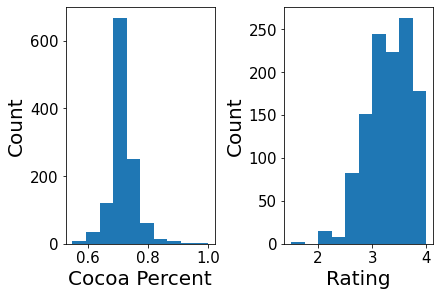

In [21]:
# Create histograms of numerical data

# Create figure
fig, axes = plt.subplots(1, 2, layout = 'constrained')

# Specify features interested in
num_features = ['Cocoa Percent', 'Rating']
x_axes = num_features
y_axes = ['Count', 'Count']

# Create histograms
axes = np.ravel(axes)

for idx, ax in enumerate(axes):
    ax.hist(chocolate_usa[num_features[idx]].dropna(), bins = 10)
    ax.set_xlabel(x_axes[idx], fontsize = 20)
    ax.set_ylabel(y_axes[idx], fontsize = 20)
    ax.tick_params(axis = 'both', labelsize = 15)
    
plt.show()

**Conclusions:**

Cocoa Percent appears to be a normal distribution but Rating is heavily skewed left.

In [22]:
# Bar charts of some of the categorical features

#create a copy of the data frame for use with graphing
chocolate_plots = chocolate_usa.copy()

In [23]:
# Convert Ratings to ranking
chocolate_plots.loc[chocolate_plots.Rating <= 5, 'Rank'] = 'Outstanding'
chocolate_plots.loc[chocolate_plots.Rating <= 3.9, 'Rank'] = 'Highly Recommended'
chocolate_plots.loc[chocolate_plots.Rating <= 3.49, 'Rank'] = 'Recommended'
chocolate_plots.loc[chocolate_plots.Rating <= 2.9, 'Rank'] = 'Disappointing'
chocolate_plots.loc[chocolate_plots.Rating <= 1.9, 'Rank'] = 'Unpleasant'

chocolate_plots.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,matches,company,COMPANY NAME,CITY,STATE,OWNER/MAKER,Rank
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,Recommended
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,Highly Recommended
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,Highly Recommended
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,Recommended
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,Highly Recommended


In [24]:
# Count of Ratings in the US
ratings_counts = chocolate_plots['Rank'].value_counts()

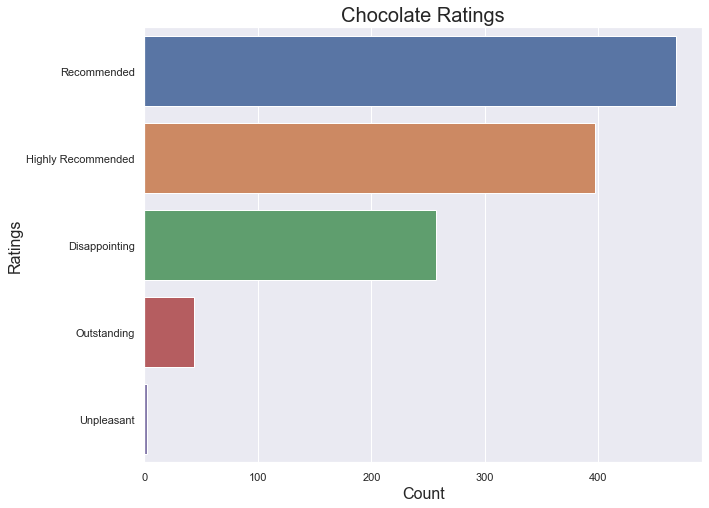

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(y = ratings_counts.index, x = ratings_counts.values)
ax.set_xlabel('Count', fontsize = 16)
ax.set_ylabel('Ratings', fontsize = 16)
ax.set_title('Chocolate Ratings', fontsize = 20)
plt.show()

**Conclusions:**

* There are more Recommended and Highly Recommended chocolates with minimal Outstanding and Unpleasant.

In [26]:
# Count of locations (State) of chocolate makers
companies_counts = chocolate_plots['STATE'].value_counts()

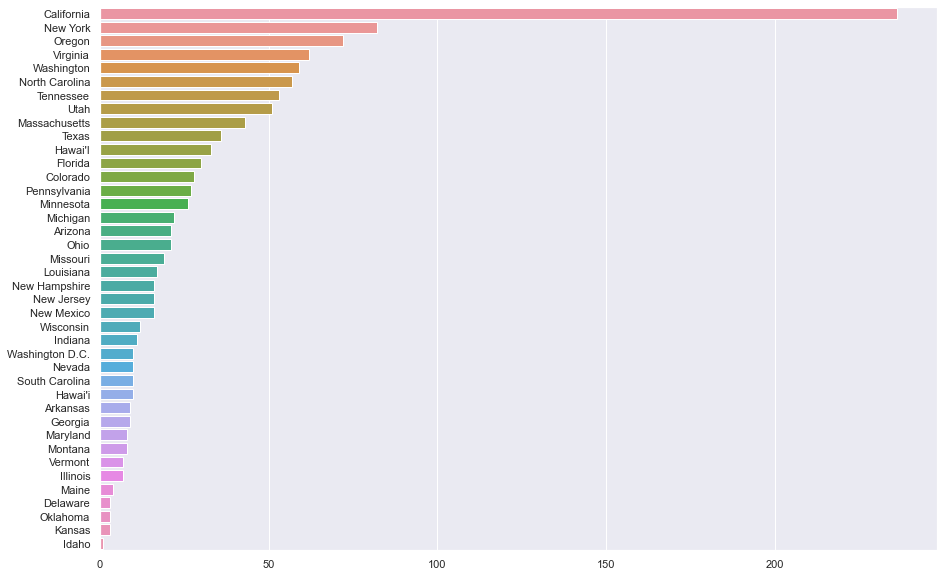

In [27]:
sns.set(rc={'figure.figsize':(15,10)})
x = sns.barplot(y = companies_counts.index, x = companies_counts.values)
ax.set_xlabel('Count', fontsize = 16)
ax.set_ylabel('State', fontsize = 16)
ax.set_title('State Location of Chocolate Makers', fontsize = 20)
plt.show()

**Conclusions:**

* There are significantly more companies from the California then the rest of the states.

In [28]:
# Count of Country of Bean Origin
origin_counts = chocolate_plots['Country of Bean Origin'].value_counts()

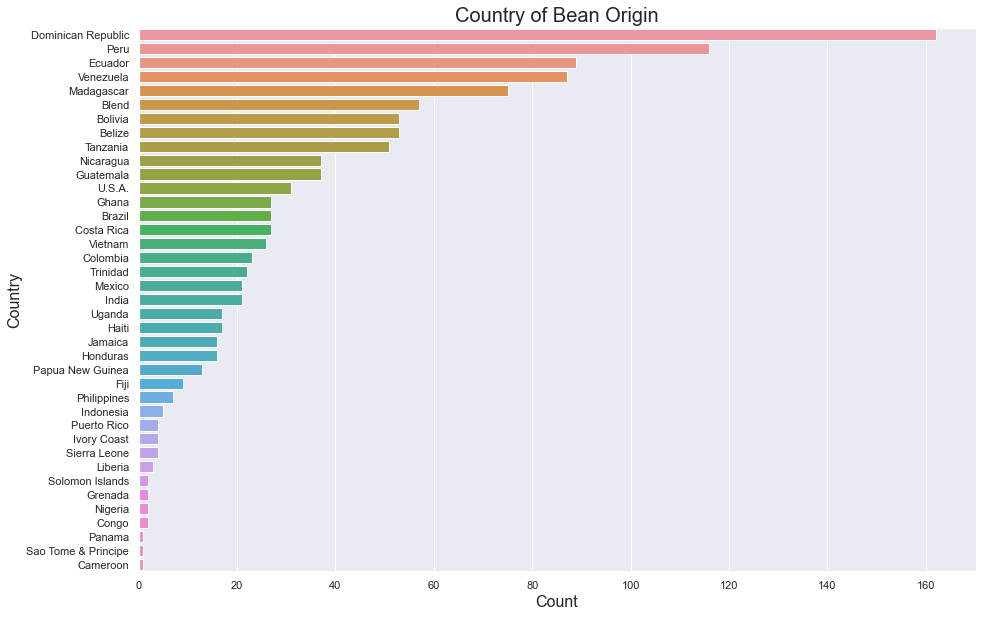

In [29]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.barplot(y = origin_counts.index, x = origin_counts.values)
ax.set_xlabel('Count', fontsize = 16)
ax.set_ylabel('Country', fontsize = 16)
ax.set_title('Country of Bean Origin', fontsize = 20)
plt.show()

**Conclusions:**
* Dominican Republic, Peru, Ecuador, and Venezula are the top producers of cacao beans used in US companies making chocolates.

In [30]:
# Count of Ingredients
ingredients_counts = chocolate_plots['Ingredients'].value_counts()

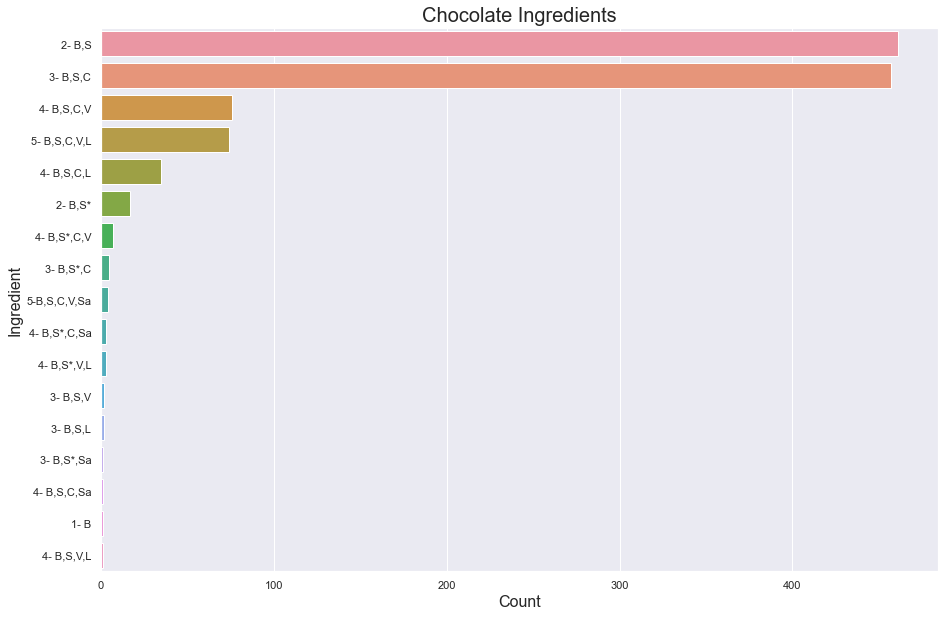

In [31]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.barplot(y = ingredients_counts.index, x = ingredients_counts.values)
ax.set_xlabel('Count', fontsize = 16)
ax.set_ylabel('Ingredient', fontsize = 16)
ax.set_title('Chocolate Ingredients', fontsize = 20)
plt.show()

**Conclusions**

Most of the chocolate is made with 2 ingredients (Butter and Sugar) and 3 ingredients (Butter, Sugar, and Cocoa Butter).

(-0.5, 1599.5, 799.5, -0.5)

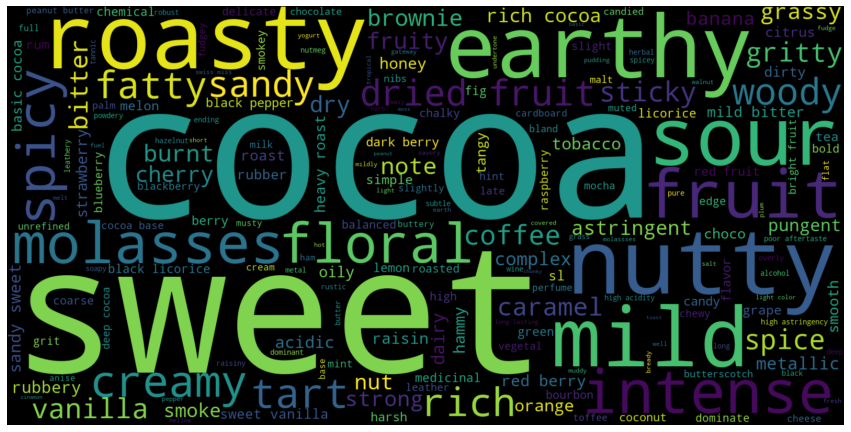

In [32]:
# Most frequent words in the Characteristics

word_string = " ".join(chocolate_usa['Most Memorable Characteristics'].str.lower())

plt.figure(figsize=(15,15))

word_cloud = WordCloud(background_color = "black", width=1600, height=800)
word_cloud.generate(word_string)

plt.imshow(word_cloud.recolor(colormap = 'viridis' , random_state = 17), interpolation="bilinear")
plt.axis('off')

**Conclusions:**
* Not looking at the other features, it looks like cocoa, sweet, nutty and roasty seem to characterize most frequently about the company's chocolate the most.

**Final Milestone 1 Conclusion**

* We will be looking at 1,168 chocolates from the USA
    * 39 unique Bean origins
    * 17 unique Ingredients (combinations)
    * 40 different States
    * 167 different Cities
    * 227 unique Companies
* Just looking at the United States chocolatiers, most of the chocolates are rated fairly high with most made in California. 
* Dominican Republic and Peru also seem to initially be the beans of choice.
* Further analysis needs to be done with correlations between the features and breaking down some of the features to further look into what makes a good chocolate.  
* If I have time it would be interesting to compare US companies with the rest of the world.

## Milestone 2: Data Preparation

In [33]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

In [34]:
# Examine first 5 rows
chocolate_usa.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,matches,company,COMPANY NAME,CITY,STATE,OWNER/MAKER
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz


In [35]:
chocolate_usa.shape

(1168, 16)

### Step 1: Standardize Ratings to their appropriate scale

Ratings are based on the following chart:

* 4.0 - 5.0 = Outstanding
* 3.5 - 3.9 = Highly Recommended
* 3.0 - 3.49 = Recommended
* 2.0 - 2.9 = Disappointing
* 1.0 - 1.9 = Unpleasant

I will convert the current rating to a 5, 4, 3.5, 3, 2 rating scale to match up with the ranks

In [36]:
def convert_rating(rating):
    '''
    Convert Ratings to their proper scale
    
    args: 
        rating(int)
        
    return:
        scale(int)
    '''
    # initialize scale to lowest
    scale = 1
    
    # convert rating to scale
    if rating <= 1.9:
        scale = 2
    elif rating <= 2.9:
        scale = 3
    elif rating <= 3.49:
        scale = 3.5
    elif rating <= 3.9:
        scale = 4
    else:
        scale = 5
        
    return scale

In [37]:
chocolate_usa.loc[:,'rating_rank'] = chocolate_usa.loc[:,'Rating'].apply(convert_rating)

# drop rating, using rank
chocolate_usa.drop('Rating', axis = 1, inplace = True)

# rename rating_rank to rating
chocolate_usa.rename(columns = {'rating_rank': 'rating'}, inplace = True)

chocolate_usa.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,matches,company,COMPANY NAME,CITY,STATE,OWNER/MAKER,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready","(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,3.5
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body","(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,4.0
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory","(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,4.0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery","(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,3.5
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy","(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,4.0


### Step 2: Get characteristics with more than 20 mentions

In [38]:
# get counts of characteristics
char_dict = {}

for index, row in chocolate_usa.iterrows():
    words = row['Most Memorable Characteristics'].split(',')
    
    for word in words:
        word_check = word.strip().lower()
        
        if word_check in char_dict.keys():
            char_dict[word_check] += 1
        else:
            char_dict[word_check] = 1

In [39]:
# Remove words mentioned less than 10 times
char_dict = { k: v for k, v in char_dict.items() if v >= 20 }
len(char_dict)

35

In [40]:
char_dict

{'rich cocoa': 24,
 'fatty': 47,
 'cocoa': 121,
 'earthy': 98,
 'nutty': 106,
 'intense': 72,
 'cherry': 23,
 'molasses': 66,
 'rich': 35,
 'sweet': 140,
 'sandy': 63,
 'dairy': 22,
 'spice': 27,
 'gritty': 41,
 'caramel': 30,
 'fruit': 43,
 'dry': 28,
 'sour': 61,
 'roasty': 104,
 'spicy': 63,
 'sticky': 42,
 'woody': 41,
 'tart': 41,
 'creamy': 61,
 'floral': 68,
 'brownie': 23,
 'complex': 24,
 'dried fruit': 43,
 'acidic': 20,
 'astringent': 22,
 'bitter': 29,
 'coffee': 29,
 'vanilla': 48,
 'fruity': 30,
 'grassy': 29}

In [41]:
# Remove characteristics not in the top
for index, row in chocolate_usa.iterrows():
    words = row['Most Memorable Characteristics'].split(',')
    new_list = []
    
    for word in words:
        word_check = word.strip().lower()
        
        if word_check in char_dict.keys():
            new_list.append(word_check)

    chocolate_usa.at[index, 'Most Memorable Characteristics'] = ','.join(new_list)
    
chocolate_usa.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,matches,company,COMPANY NAME,CITY,STATE,OWNER/MAKER,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa,fatty","(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,3.5
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C",cocoa,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,4.0
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C",cocoa,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,4.0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C",,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,3.5
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C",,"(5150 Chocolate Co., 90)",5150 Chocolate Co.,5150 Chocolate Co.,Delray Beach,Florida,Tyler Levitetz,4.0


### Step 3: Drop Unnecessary columns

In [42]:
chocolate_usa.drop(['Company (Manufacturer)', 'Company Location', 'matches', 'COMPANY NAME', 'OWNER/MAKER'], axis = 1, inplace = True)
chocolate_usa.head()

,REF,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,company,CITY,STATE,rating
0,2454,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa,fatty",5150 Chocolate Co.,Delray Beach,Florida,3.5
1,2454,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C",cocoa,5150 Chocolate Co.,Delray Beach,Florida,4.0
2,2458,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C",cocoa,5150 Chocolate Co.,Delray Beach,Florida,4.0
3,2542,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C",,5150 Chocolate Co.,Delray Beach,Florida,3.5
4,2542,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C",,5150 Chocolate Co.,Delray Beach,Florida,4.0


### Step 4: Check for empty rows

In [43]:
#look for missing data in the training and test sets
print(chocolate_usa.isna().sum())

REF                                  0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         18
Most Memorable Characteristics       0
company                              0
CITY                                 0
STATE                                0
rating                               0
dtype: int64


In [44]:
# Since you can't make up ingredients, I will drop the 13/5 rows with empty ingredients
chocolate_usa.dropna(inplace = True)

In [45]:
#look for missing data in the training and test sets
print(chocolate_usa.isna().sum())

REF                                 0
Review Date                         0
Country of Bean Origin              0
Specific Bean Origin or Bar Name    0
Cocoa Percent                       0
Ingredients                         0
Most Memorable Characteristics      0
company                             0
CITY                                0
STATE                               0
rating                              0
dtype: int64


### Step 5: Rename columns

Rename column names for ease of use and consistency

In [46]:
# Rename column names
header_names = {'Review Date': 'review_year',
                'Country of Bean Origin': 'bean_origin',
                'Specific Bean Origin or Bar Name': 'specific_bean_origin',
                'Cocoa Percent': 'cocoa_percent',
                'Ingredients': 'ingredients',
                'Most Memorable Characteristics': 'characteristics',
                'CITY': 'city',
                'STATE': 'state'
               }

chocolate_usa.rename(columns = header_names, inplace = True)

In [47]:
# Check columns in datasets
print(chocolate_usa.columns)

Index(['REF', 'review_year', 'bean_origin', 'specific_bean_origin',
       'cocoa_percent', 'ingredients', 'characteristics', 'company', 'city',
       'state', 'rating'],
      dtype='object')


### Step 6: Create Dummy variables

In [48]:
print(chocolate_usa.shape)

(1150, 11)


In [49]:
# Select categorical columns except characteristics
categorical_columns = chocolate_usa.select_dtypes('object').columns.difference(['characteristics'])

In [50]:
# Create dummy variables, drop first one to prevent collinearity between to dummy variables
chocolate_usa = pd.get_dummies(chocolate_usa, columns = categorical_columns, drop_first = True)

In [51]:
# Get shape of features datasets
print(chocolate_usa.shape)

(1150, 1262)


In [52]:
# convert characteristics into dummy variables
chocolate_usa = pd.concat([chocolate_usa, chocolate_usa['characteristics'].str.get_dummies(sep=',')], axis = 1)

# Drop characteristics column
chocolate_usa.drop('characteristics', axis = 1, inplace = True)

In [53]:
print(chocolate_usa.shape)

(1150, 1296)


In [54]:
# Drop REF column
chocolate_usa.drop('REF', axis = 1, inplace = True)

### Step 7: Final Training dataset

In [55]:
chocolate_usa.head()

,review_year,cocoa_percent,rating,bean_origin_Blend,bean_origin_Bolivia,bean_origin_Brazil,bean_origin_Cameroon,bean_origin_Colombia,bean_origin_Congo,bean_origin_Costa Rica,...,roasty,sandy,sour,spice,spicy,sticky,sweet,tart,vanilla,woody
0,2019,0.76,3.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,0.76,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019,0.76,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,0.68,3.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,0.68,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
chocolate_usa.describe()

,review_year,cocoa_percent,rating,bean_origin_Blend,bean_origin_Bolivia,bean_origin_Brazil,bean_origin_Cameroon,bean_origin_Colombia,bean_origin_Congo,bean_origin_Costa Rica,...,roasty,sandy,sour,spice,spicy,sticky,sweet,tart,vanilla,woody
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,...,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000
mean,2015.309565,0.714935,3.617826,0.048696,0.046087,0.023478,0.000870,0.020000,0.001739,0.022609,...,0.089565,0.052174,0.053043,0.023478,0.051304,0.036522,0.117391,0.035652,0.040000,0.035652
std,3.925746,0.045468,0.464852,0.215325,0.209765,0.151483,0.029488,0.140061,0.041685,0.148717,...,0.285682,0.222474,0.224218,0.151483,0.220714,0.187666,0.322026,0.185502,0.196044,0.185502
min,2006.000000,0.550000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,0.700000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,0.700000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.740000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
print(chocolate_usa.shape)

(1150, 1295)


### Step 8: Create Training/Test Datasets

In [58]:
# Pull out features and target for splitting
features = chocolate_usa.loc[:, chocolate_usa.columns != 'rating']
target = chocolate_usa['rating']

# encode target variable
lab = preprocessing.LabelEncoder()
target = lab.fit_transform(target)

In [59]:
# Split data into training and test data
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 15)

In [60]:
# Reset index
features_train = features_train.reset_index(drop = True)
features_test = features_test.reset_index(drop = True)

In [61]:
print(f"features_train: {features_train.shape}")
print(f"features_test: {features_test.shape}")
print(f"target_train: {target_train.shape}")
print(f"target_test: {target_test.shape}")

features_train: (920, 1294)
features_test: (230, 1294)
target_train: (920,)
target_test: (230,)


### Summary of Data Preparation Steps
* Dropped unnecessary features
* Converted Ratings to the standard rating scale
* Pulled out top 20 characteristics
* Created dummy variables
* Split data into training and test data

## Milestone 3: Model Building and Evaluation

In [62]:
# Import libraries
import numpy as np
from sklearn import preprocessing
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Step 1: Determine the best model

In [63]:
# Create a pipeline
pipe = Pipeline([
    ('scale', preprocessing.StandardScaler()),
    ('classifier', RandomForestClassifier())
])

In [64]:
# Fit the training data
pipe.fit(features_train, target_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [65]:
# Get accuracy of test data
pipe.score(features_test, target_test)

0.5173913043478261

In [66]:
# Create dictionary with candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [5, 10, 20]},
                {'classifier': [LogisticRegression(multi_class = 'ovr', max_iter=1000)],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)}]

In [67]:
gridsearch = GridSearchCV(pipe, search_space, cv = 5, verbose = 0).fit(features_train, target_train)

C:\Users\Osgiliath\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Osgiliath\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 145.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Osgiliath\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Osgiliath\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self.

In [68]:
gridsearch.best_params_

{'classifier': RandomForestClassifier(max_features=20, n_estimators=1000),
 'classifier__max_features': 20,
 'classifier__n_estimators': 1000}

In [69]:
score = gridsearch.score(features_test, target_test)
score

0.5347826086956522

In [70]:
features_predict = gridsearch.best_estimator_.predict(features_test)

In [71]:
cm = confusion_matrix(target_test, features_predict)

In [78]:
class_names = lab.classes_

[<class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>]


In [73]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.grid(False)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_20252\1635916123.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


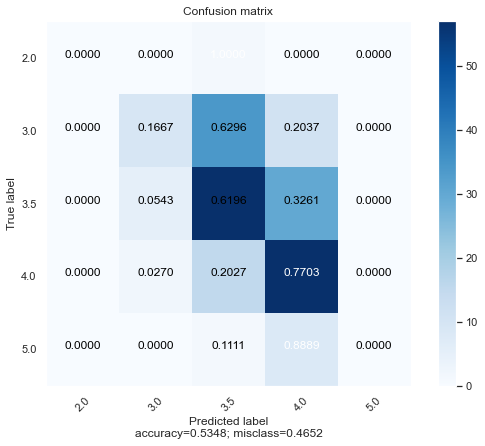

In [74]:
plot_confusion_matrix(cm, class_names)

In [80]:
class_list = [str(item) for item in class_names]

classification_rpt = classification_report(target_test, features_predict, target_names = class_list)
print(classification_rpt)

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.56      0.17      0.26        54
         3.5       0.53      0.62      0.57        92
         4.0       0.54      0.77      0.63        74
         5.0       0.00      0.00      0.00         9

    accuracy                           0.53       230
   macro avg       0.33      0.31      0.29       230
weighted avg       0.52      0.53      0.49       230



C:\Users\Osgiliath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Osgiliath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Osgiliath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looking at the F1-score, the model seems to correctly predict ratings of 3.5 and 4 better than the lower scores.  This could be due to the fact that there were more samples of these ratings then the others.

### Step 2: Reduce Number of Features with PCA

In [81]:
search_space = [{'rf__n_estimators': [10, 100, 1000],
                 'rf__max_features': [1, 2, 3]}]

# Construct some pipelines
pipe_pca = Pipeline([
    ('pca', PCA(n_components = 0.90, whiten = True)),
    ('rf', RandomForestClassifier())
])

In [82]:
# Fit the pipelines
pipe_pca.fit(features_train, target_train)

Pipeline(steps=[('pca', PCA(n_components=0.9, whiten=True)),
                ('rf', RandomForestClassifier())])

In [83]:
pipe_pca.score(features_test, target_test)

0.47391304347826085

In [84]:
features_predict_pca = pipe_pca.predict(features_test)

In [85]:
np.sum(features_predict == target_test)/len(target_test)

0.5347826086956522

In [86]:
cm_pca = confusion_matrix(target_test, features_predict_pca)

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_20252\1635916123.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


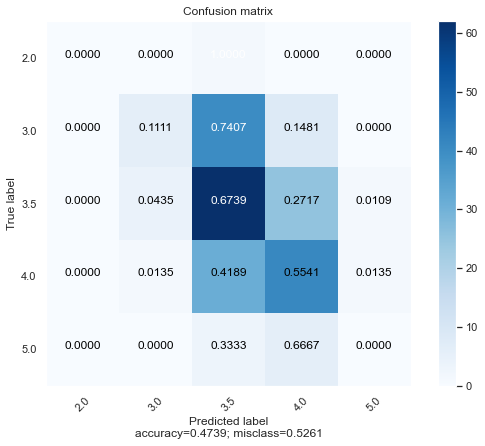

In [87]:
plot_confusion_matrix(cm_pca, class_names)

In [88]:
classification_rpt_pca = classification_report(target_test, features_predict_pca, target_names = class_list)
print(classification_rpt_pca)

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.55      0.11      0.18        54
         3.5       0.45      0.67      0.54        92
         4.0       0.51      0.55      0.53        74
         5.0       0.00      0.00      0.00         9

    accuracy                           0.47       230
   macro avg       0.30      0.27      0.25       230
weighted avg       0.47      0.47      0.43       230



C:\Users\Osgiliath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Osgiliath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Osgiliath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looking at the F1-score, reducing the features does not improve the accuracy nor the predictions.